# Implémentation de l'algorithme de Huffman en Python

On utilisera la librairie `Graphviz` pour pouvoir représenter les arbres de façon graphique

La classe `Noeud` aura donc une nouvelle méthode permettant d'utiliser cette librairie

La donnée contenue dans un noeud de l'arbre sera un *tuple (caractère, poids)*

Le caractère étant un des caractères du texte à encoder, et son poids étant son nombre d'occurence dans ce texte.


In [7]:
from graphviz import Digraph

class Noeud :
    def __init__(self, val = None, fg = None, fd = None) :
        self.set_val(val)
        self.set_fg(fg)
        self.set_fd(fd)
        
    def get_val(self):
        return self.val

    def set_val(self,nouvelle_val):
        self.val = nouvelle_val
        
    def get_fg(self):
        return self.fg

    def set_fg(self,nouveau_fg):
        self.fg = nouveau_fg
        
    def get_fd(self):
        return self.fd

    def set_fd(self,nouveau_fd):
        self.fd = nouveau_fd
        
        
    
    def poids(self):
        return self.get_val()[1]
    
    def affich_infixe(self) :
        if self.get_fg() is not None : self.get_fg().affich_infixe()
        print(self.get_val(), end = " ")
        if self.get_fd() is not None : self.get_fd().affich_infixe()  
            
    def show(self):
        """Renvoie un objet graphviz pour la visualisation graphique de l'arbre"""
        def representation(dot, noeud, aretes):
            # Ajoute la représentation du noeud à la représentation dot de l'arbre
            if noeud is not None:
                dot.node(str(id(noeud)), str(noeud.val))
                # Appel récursif de la fonction representation
                if noeud.get_fg() is not None:
                    representation(dot, noeud.get_fg(), aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.get_fg()))))
                if noeud.get_fd() is not None:
                    representation(dot, noeud.get_fd(), aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.get_fd()))))
                    
        dot = Digraph(comment="Arbre binaire", format='svg')
        aretes = []
        representation(dot, self, aretes)
        dot.edges(aretes)
        return dot

# Comptage des occurences des caractères 

A partir du texte à encoder, on va créer un dictionnaire dont les clefs sont les caractères du texte et leur valeur le nombre des occurences de ces caractères.

Exemple :  
 

```
texte = "Hello"  
dico = {"H":1, "e":1, "l":2, "o":1}
```


Implémenter la fonction *texte_to_occurrences(texte)* permettant le comptage des occurences et qui retournera le dictionnaire.

Un peu d'aide si besoin : 

>```
texte_to_occurrences(texte)
    on crée un dictionnaire vide 
    pour chaque caractère du texte
        si le caractère n'est pas dans le dictionnaire 
            on le rajoute dans le dictionnaire avec sa valeur à 1
        sinon
            on incremente sa valeur dans le dictionnaire de 1
    on retourne le dictionnaire
```



In [8]:
# Votre code ici

def texte_to_occurrences(texte):
    dico={}
    for e in texte:
        if e not in dico:
            dico[e] = 1
        else:
            dico[e] += 1
    return dico

In [9]:
# Tests
texte_source = "Anticonstitutionnel"
dico_occ = texte_to_occurrences(texte_source)
assert dico_occ == {'A': 1, 'n': 4, 't': 4, 'i': 3, 'c': 1, 'o': 2, 's': 1, 'u': 1, 'e': 1, 'l': 1}

# Création des feuilles  

A partir du dictionnaire, on va le classer dans l'ordre croissant des occurrences puis créer des feuilles (des Noeuds) contenant le tuple (caractère, poids) le poids étant le nombre d'occurence du caractère. L'ensemble de ces feuilles sera enregistré dans une liste *feuilles*

Exemple :   

![image.png](attachment:image.png)

Implémenter la fonction *creer_feuille(dico)* permettant le comptage des occurences et qui retournera la liste contenant toutes les feuilles classées par ordre croissant d'occurence.

Un peu d'aide si besoin : 

>```
creer_feuille(dico)
    on crée une liste "liste_travail" dans laquelle on enregistre les données du dico   
        triés par ordre croisant  
    on crée une liste "feuilles" vide  
    pour chaque element de la liste "liste_travail"  
        on ajoute à la liste "feuilles" le noeud ayant pour valeur le tuple (caractère, poids)   
    on retourne le dictionnaire  
```

```
pour trier la liste : 

liste_travail = sorted(dico.items(), key = lambda x: x[1])
```



In [10]:
# Votre code ici

def creer_feuille(dico) :
    liste_travail = sorted(dico.items(), key = lambda x: x[1])
    feuilles = []
    for elem in liste_travail:
        feuilles.append(Noeud((elem[0], elem[1])))
    return feuilles

In [11]:
# Tests
liste_feuilles = creer_feuille(dico_occ)

for elem in liste_feuilles :
    elem.affich_infixe()
    print(" , ") 

('A', 1)  , 
('c', 1)  , 
('s', 1)  , 
('u', 1)  , 
('e', 1)  , 
('l', 1)  , 
('o', 2)  , 
('i', 3)  , 
('n', 4)  , 
('t', 4)  , 


# Insertion d'un arbre à la bonne place dans la liste "forêt"  

La liste *foret* est en fait la liste "feuilles" qui progressivement se transforme en liste d'arbre... donc en forêt :) 

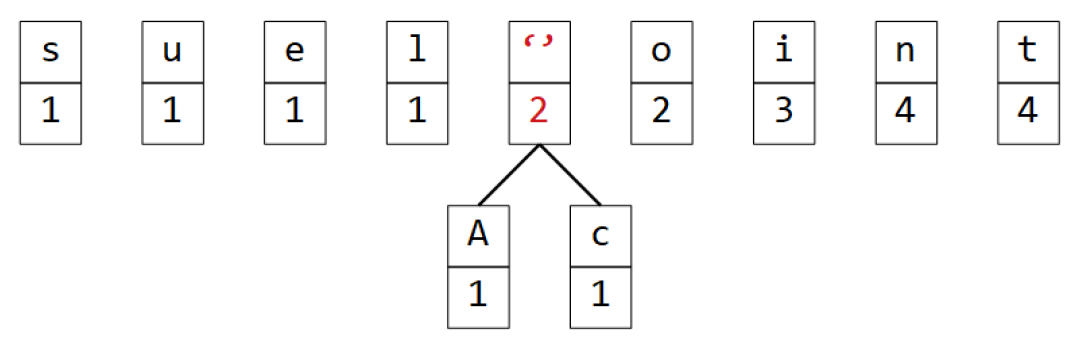

Cette fonction *insertion(arbre, foret)* n'est pas à coder, elle permet d'insérer un arbre dans la liste "foret" à la bonne place, c'est à dire en respectant toujours que les poids (les occurences) soient toujours dans l'ordre croissant.

In [12]:
def insertion(arbre, foret) :
    i = 0
    if len(foret) > 0 :
        while arbre.poids() > foret[i].poids() :
            i = i+ 1   
            if i == len(foret) : break            
        if i < len(foret) :
            foret.insert(i, arbre)
        else :
            foret.append(arbre)
    else :
        foret.append(arbre)
    return foret

In [13]:
# Tests

print("Pas de Tests !!!")

Pas de Tests !!!


# Algorithme d'Huffman  

Tout le travail préparatoire étant accompli, on peut enfin coder la fonction qui construit **l'arbre de Huffman**

Vous allez maintenent implémenter la fonction *hufmann_tree (foret)* qui prend en paramètre la liste *foret* qui est en train de se construire et applique l'algorithme suivant : 

>```
hufmann_tree(foret)
    Tant que la taille de la foret est plus grande que 1 
        On prend les 2 feuilles (ou arbres) les plus petits  
        On crée un nouvel arbre à partir de ces 2 feuilles dont la valeur sera ("", somme des poids)   
            et dont les fils seront les feuilles  
        On insére ce nouvel arbre dans la foret         
    On retourne le 1er element de la foret, c'est à dire l'arbre ;)
```

In [14]:
# Votre code ici

def hufmann_tree (foret) :
    while len(foret)>1 :
        arb1 = foret.pop(0)
        arb2 = foret.pop(0)
        arb_fusion = Noeud(('', arb1.poids() + arb2.poids()), arb1, arb2)
        foret = insertion(arb_fusion, foret)
    return foret[0]

In [15]:
#Tests
foret = creer_feuille(dico_occ)
huffman = hufmann_tree(foret)
huffman.affich_infixe()

('e', 1) ('', 2) ('l', 1) ('', 4) ('s', 1) ('', 2) ('u', 1) ('', 8) ('n', 4) ('', 19) ('t', 4) ('', 11) ('i', 3) ('', 7) ('A', 1) ('', 2) ('c', 1) ('', 4) ('o', 2) 

# Affichage un peu plus "humain"  

L'arbre de Hufffman géneré n'est pas très compréhensible pour les humains normaux, on va utiliser la librairie Graphviz pour construire une représentation de cet arbre 

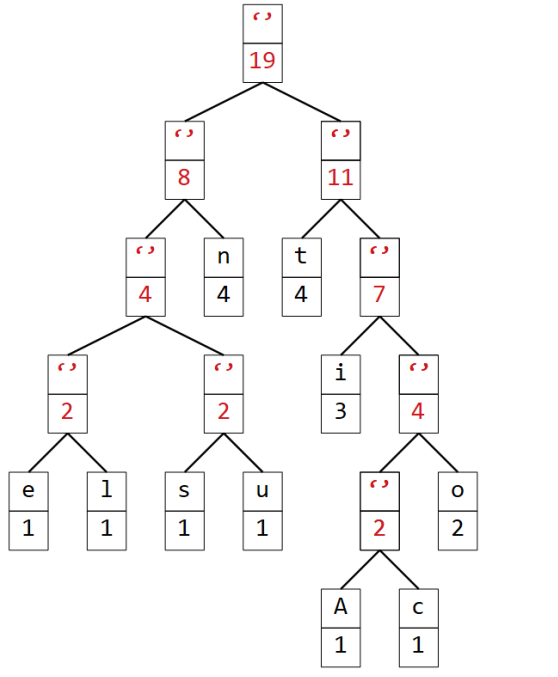


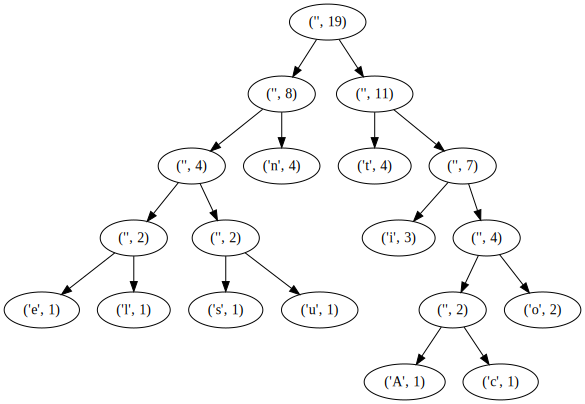

In [16]:
visualisation = huffman.show()
visualisation


# On peut aussi génerer un fichier au format jpeg, png ... avec les commandes suivantes


# visualisation.format = 'jpeg'
# visualisation.format = 'png'
# visualisation.render('truc', view=True) 

# Table de codage des caractères 

L'arbre de Hufffman va nous permettre de trouver la table de codage de chaque caractère.

- On parcourt l'arbre à partir de la racine
- On note 0 si on part vers la gauche 
- On note 1 si on part vers la droite
    
   
Pour implementer ce codage on utilisera un dictionnaire *dico* qui contiendra comme clefs les caractères de l'arbre et comme valeur pour ces clefs les séquences binaires pour les "trouver" dans l'arbre de Huffman. 

On parcourt l'arbre de Huffman recursivement en ajoutant "0" ou "1" selon si l'on part à gauche ou à droite   
SI on trouve une valeur différente de "" alors c'est que l'on a un caractère et donc on l'ajoute au dictionnaire ainsi que son code.

>```
fonction encodage(arbre, dico = {}, code ="")  
    si l'arbre n'est pas vide   
        alors  
        encodage(arbre.fils_gauche, dico, code + "0")  
        encodage(arbre.fils_droit, dico, code + "1")  
        si arbre.valeur != ""  
            alors  
            ajouter dans le dico le couple (arbre.valeur, code)     
    retourner le dico  
```    


In [17]:
# Votre code ici

def tree_to_code(tree, dico ={}, code = "") :
    if tree is not None :
        tree_to_code(tree.fg, dico, code + '0')
        tree_to_code(tree.fd, dico, code + '1')
        if tree.get_val()[0] != '' :
            dico[tree.get_val()[0]] = code
    return dico

In [18]:
# Tests

table_codage = tree_to_code(huffman)

for element in table_codage:
    print(f"{element} : {table_codage[element]}")

e : 0000
l : 0001
s : 0010
u : 0011
n : 01
t : 10
i : 110
A : 11100
c : 11101
o : 1111


# Encodage du texte 

Maintenant que nous avons la table de codage , il suffit de remplacer chaque caractère du texte original par sa séquence binaire associée.

Implémenter la fonction encodage(texte, table_codage)


Un peu d'aide si besoin : 

>```
encodage(texte, table_codage)
     On crée un chaine de caractère "texte_encodage" vide
     Pour chaque caractère de "texte" 
         on ajoute à la chaine "texte_encodage" le code binaire correspondant à ce caractère
     On retourne "texte_encodage"   
```


In [19]:
# Votre code ici

def encodage(texte, table_codage):
    texte_encodage=""
    for e in texte:
        texte_encodage += table_codage.get(e)
    return texte_encodage

In [20]:
# Tests

tex_enc=encodage(texte_source,table_codage)
print(tex_enc)

11100011011011101111101001010110100011101101111010100000001


# Fonction finale 

Créer une fonction finale *encodage_Huffman(texte)* qui regroupe l'ensemble des fonctions que nous avons créées. 

La fonction *encodage_Huffman(texte)* doit retourner : 
    - le texte encodé
    - l'arbre d'huffman qui sera nécessaire pour le décodage.

In [21]:
# Votre code ici

def encodage_Huffman(texte) :     
    dico  = texte_to_occurrences(texte)
    foret = creer_feuille(dico) 
    tree = hufmann_tree(foret)
    table_codage = tree_to_code(tree) 
    texte_encode = encodage(texte, table_codage)
    return texte_encode, tree


11100011011011101111101001010110100011101101111010100000001


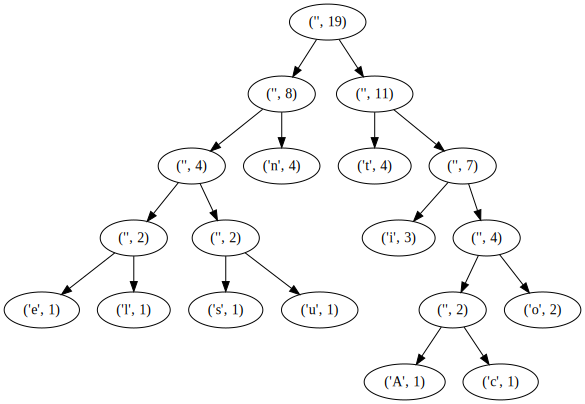

In [22]:
# Tests

texte_source = "Anticonstitutionnel"
texte_encode, arbre = encodage_Huffman(texte_source)
print(texte_encode)
arbre.show()

# DECODAGE

La fonction decodage permet à partir du texte encodé ET de l'arbre de Huffamn de décoder le texte 


In [17]:
# Mon code ici

def decode(encoded_source,arbre):
    mylist = list(encoded_source)
    texte_clair = ""
    while len(mylist) > 0 :
        tree = arbre
        while tree.get_val()[0] == '' :
            bit = mylist.pop(0)            
            if bit == '0' :
                tree = tree.fg
            else : 
                tree = tree.fd             
        texte_clair += tree.get_val()[0]
    return texte_clair

In [18]:
#Tests

texte_source = "Anticonstitutionnel"
texte_encode, arbre = encodage_Huffman(texte_source)
decode(texte_encode, arbre)

'Anticonstitutionnel'

# Quelques textes à tester


In [19]:
texte_source1 = '''La Cigale et la Fourmi
La Cigale, ayant chanté
Tout l'été,
Se trouva fort dépourvue
Quand la bise fut venue :
Pas un seul petit morceau
De mouche ou de vermisseau.
Elle alla crier famine
Chez la Fourmi sa voisine,
La priant de lui prêter
Quelque grain pour subsister
Jusqu'à la saison nouvelle.
Je vous paierai, lui dit-elle,
Avant l'Oût, foi d'animal,
Intérêt et principal. 
La Fourmi n'est pas prêteuse :
C'est là son moindre défaut.
Que faisiez-vous au temps chaud ?
Dit-elle à cette emprunteuse.
Nuit et jour à tout venant
Je chantais, ne vous déplaise.
Vous chantiez ? j'en suis fort aise.
Eh bien! dansez maintenant.
''' 

texte_source2 = "Institutionnalisation"

texte_source3 = "Attention"


In [20]:
texte_encode, arbre = encodage_Huffman(texte_source1)
print(texte_encode)
arbre.show()
decode(texte_encode, arbre)

0101001110010100110100110111011011100111100001010000111101111101100101100111101101110001110011101001101101001010011100101001101001101110110111001111000000111110111000101011101100001001111010101111110111110000100111111111011010010101111110111000011110111110111111111111100111111111000111111010010101100000101011111100110111000100101110010100110011011111000111101100110111111011111011011100011100100101100000011010100111111000110000101001101011111011001011001110001100100000101001100100001111011001010000010100000010101010100110100101011011100010010110000010101010000010001111010111111000001110110011110111101011011111000101110001100100011010010101010001011110101101110000101111110111000101110111000101100110000101100101000111001110100110010001000001100100001011011010001110101111011110000101110011110111101100101010111111000110000111001010011001100111010011000100001101000110101110111000001101110111110110010110011110110111000111001110100110101010011001011001011101101100100011000100000011111101001010

"La Cigale et la Fourmi\nLa Cigale, ayant chanté\nTout l'été,\nSe trouva fort dépourvue\nQuand la bise fut venue :\nPas un seul petit morceau\nDe mouche ou de vermisseau.\nElle alla crier famine\nChez la Fourmi sa voisine,\nLa priant de lui prêter\nQuelque grain pour subsister\nJusqu'à la saison nouvelle.\nJe vous paierai, lui dit-elle,\nAvant l'Oût, foi d'animal,\nIntérêt et principal. \nLa Fourmi n'est pas prêteuse :\nC'est là son moindre défaut.\nQue faisiez-vous au temps chaud ?\nDit-elle à cette emprunteuse.\nNuit et jour à tout venant\nJe chantais, ne vous déplaise.\nVous chantiez ? j'en suis fort aise.\nEh bien! dansez maintenant.\n"

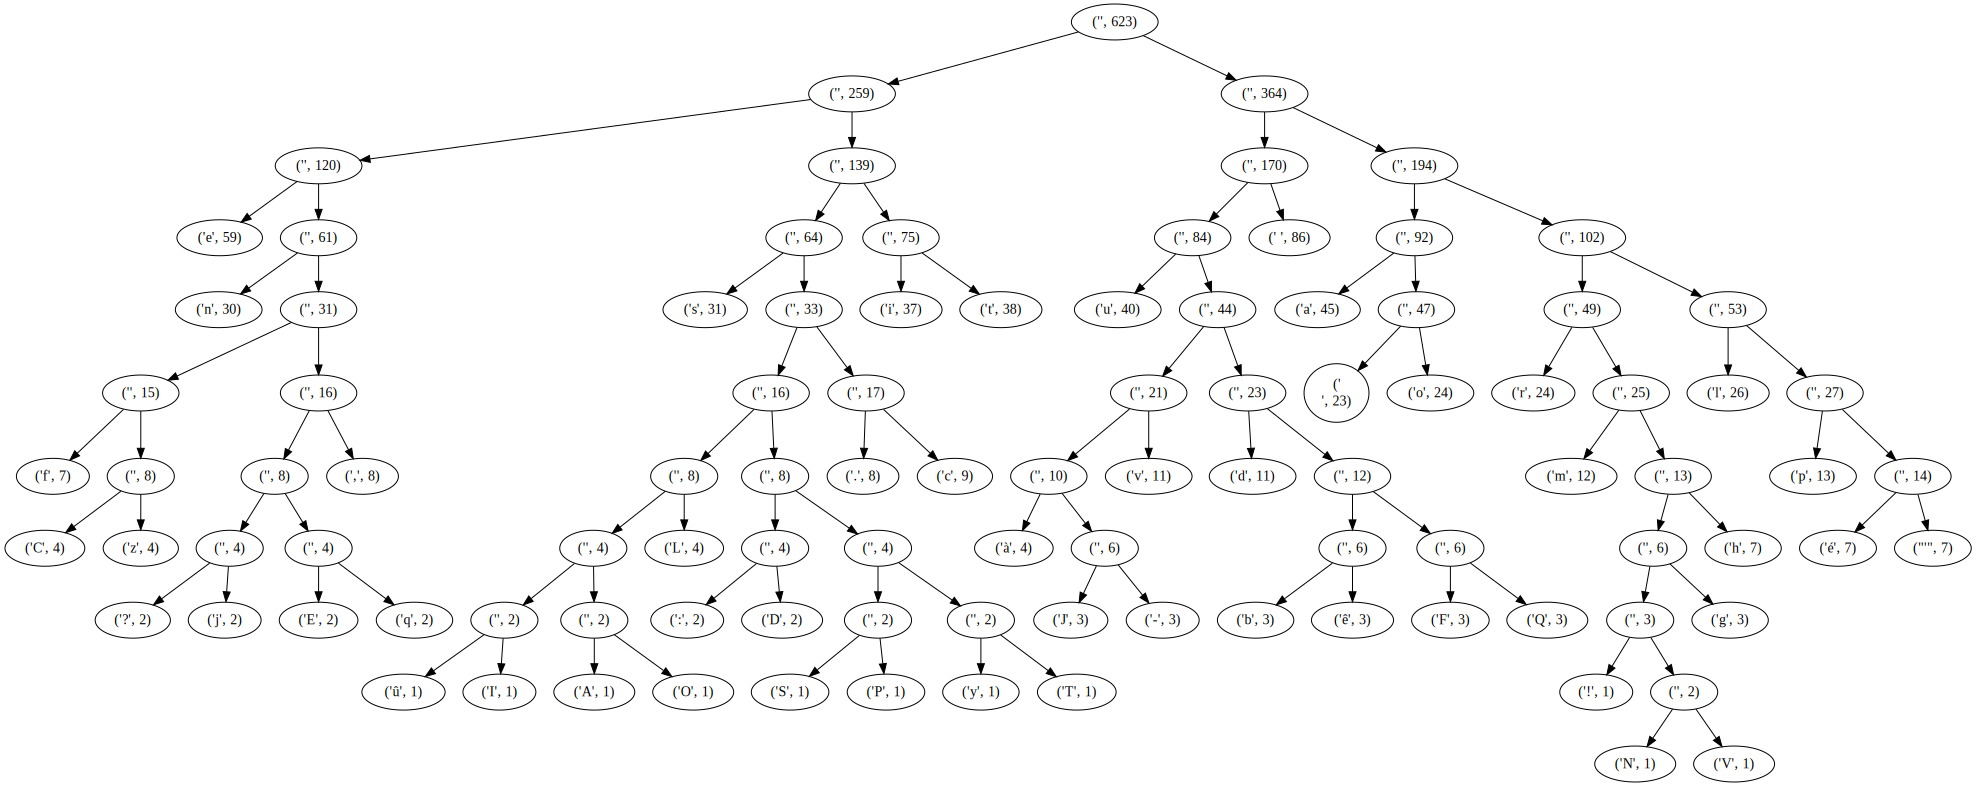

In [21]:
visualisation = arbre.show()
visualisation